# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_companies.csv

https://finance.yahoo.com/quote/AMZN/history?p=AMZN

https://finance.yahoo.com/quote/GOOG/history?p=GOOG

https://finance.yahoo.com/quote/MSFT/history?p=MSFT

https://finance.yahoo.com/quote/AAPL/history?p=AAPL

https://finance.yahoo.com/quote/TSLA/history?p=TSLA

https://datahub.io/core/s-and-p-500-companies-financials#resource-s-and-p-500-companies-financials_zip

In [28]:
# Import libries need with alias
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and font size
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Read the dataset
df = pd.read_csv('Apple.csv')


In [29]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close Price,Change in Price,Percent change in Price,Previous day Volume,Change in Volume,Percent change in Volume
0,0,2018-10-15,55.290001,55.457500,54.317501,54.340000,52.043247,123164000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-10-16,54.732498,55.747501,54.189999,55.537498,53.190125,116736000,NaN,NaN,54.340000,1.197498,0.022037,123164000.0,-6428000.0,-0.052191
2,2,2018-10-17,55.575001,55.660000,54.834999,55.297501,52.960278,91541600,NaN,NaN,55.537498,-0.239997,-0.004321,116736000.0,-25194400.0,-0.215824
3,3,2018-10-18,54.465000,54.935001,53.250000,54.005001,51.722404,130325200,NaN,NaN,55.297501,-1.292500,-0.023374,91541600.0,38783600.0,0.423672
4,4,2018-10-19,54.514999,55.314999,54.357498,54.827499,52.510155,132314800,NaN,NaN,54.005001,0.822498,0.015230,130325200.0,1989600.0,0.015266


In [30]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close Price,Change in Price,Percent change in Price,Previous day Volume,Change in Volume,Percent change in Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1209.000000,1059.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1.257000e+03,1257.000000
mean,628.500000,117.066534,118.448210,115.776212,117.172264,115.783532,1.067006e+08,117.304131,118.266978,117.123196,0.099053,0.001167,1.067445e+08,-5.706993e+04,0.040889
std,363.297628,46.925648,47.404596,46.468887,46.949189,47.242244,5.478208e+07,45.682351,40.244330,46.935596,2.379102,0.020935,5.478167e+07,3.744306e+07,0.317693
min,0.000000,35.994999,36.430000,35.500000,35.547501,34.163822,3.145820e+07,40.222700,46.396650,35.547501,-10.519997,-0.128647,3.145820e+07,-2.343016e+08,-0.654134
25%,314.250000,67.276874,68.946873,66.562498,67.976873,66.352019,7.105310e+07,70.493350,78.415019,67.864998,-1.005001,-0.009075,7.105760e+07,-1.543040e+07,-0.156393
50%,628.500000,130.155006,131.430001,128.510002,130.180001,128.837120,9.153730e+07,129.431200,132.673650,130.149994,0.122502,0.001233,9.154160e+07,-1.350000e+06,-0.018836
75%,942.750000,153.474998,155.397499,151.462505,153.695004,152.563305,1.261026e+08,153.236999,153.676300,153.649994,1.269989,0.012643,1.261428e+08,1.473880e+07,0.180613
max,1257.000000,196.240005,198.229996,195.279999,196.449997,196.185074,4.265100e+08,187.442600,168.297150,196.449997,12.000000,0.119808,4.265100e+08,2.170900e+08,2.628303


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

C:\Users\chakr\AppData\Local\Temp\ipykernel_36536\1159842336.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df.corr()


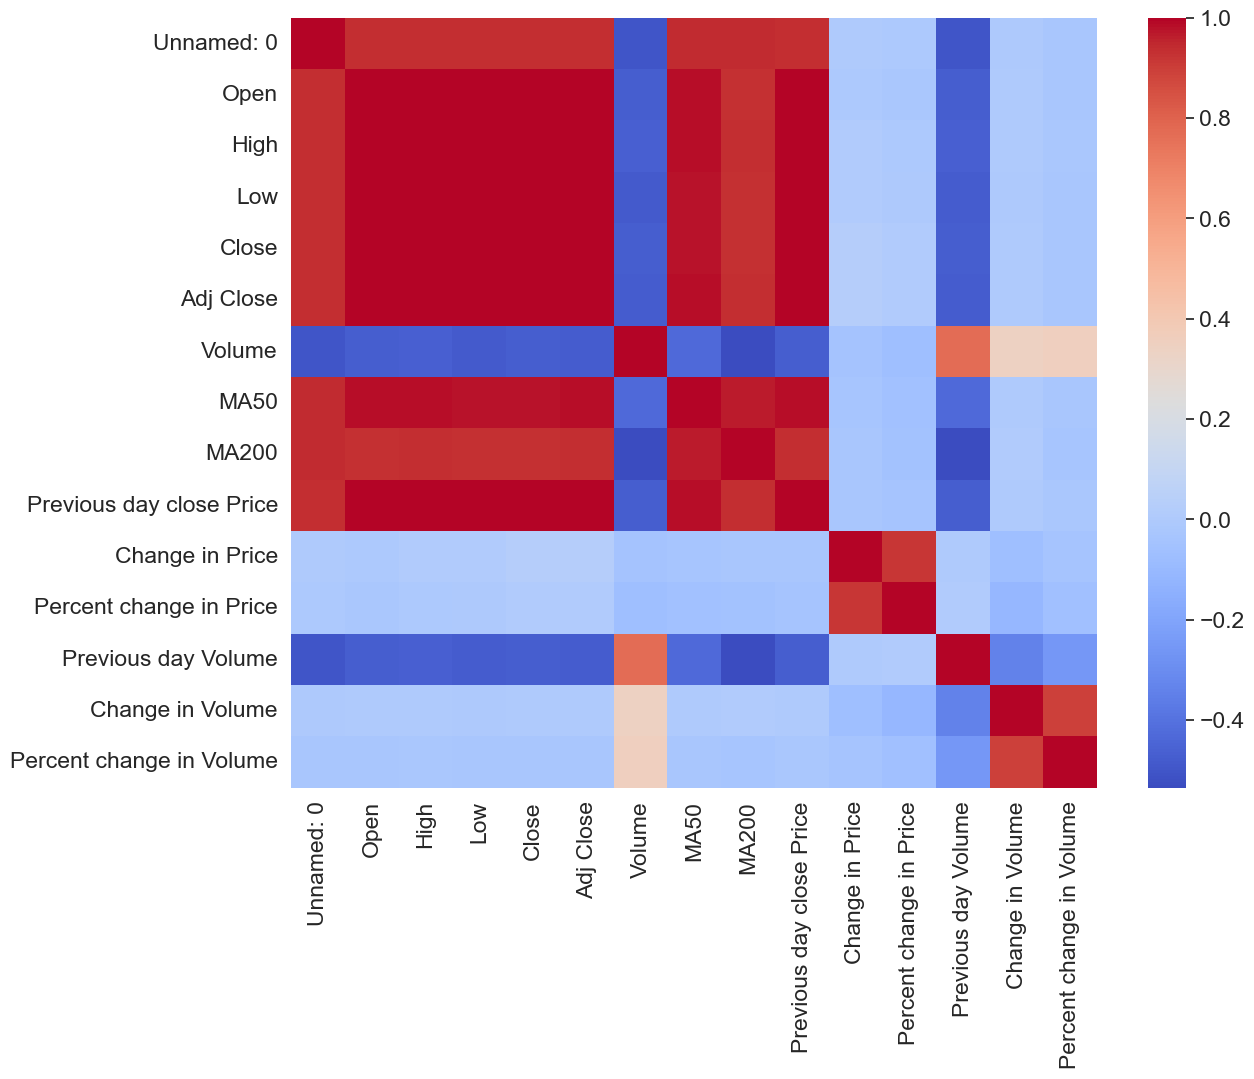

In [17]:
# Create tabular correlation matrix
corr =df.corr()
_,ax = plt.subplots(figsize = (13,10))

# Graph correlation matrix
_ = sns.heatmap(corr,ax=ax,
                   xticklabels=corr.columns.values,
                   yticklabels=corr.columns.values,
                   cmap='coolwarm')

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [18]:
# Step 1 is to assign your x and y
X = df['Open']
y = df['Close']

In [19]:
# Step 2 is to create your train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
# Take a look at the train dataset
X_train

98      42.580002
927    134.789993
990    157.339996
831    174.750000
737    143.800003
          ...    
802    171.559998
53      38.722500
350     65.937500
79      42.247501
792    169.080002
Name: Open, Length: 880, dtype: float64

In [20]:
y_train

98      43.227501
927    135.350006
990    153.720001
831    175.839996
737    142.940002
          ...    
802    172.990005
53      39.480000
350     66.542503
79      42.602501
792    171.179993
Name: Close, Length: 880, dtype: float64

In [21]:
# Step 3 is to build the model. 
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


In [22]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    0.221676
Open     0.999118
dtype: float64

In [23]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.022e+05
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:46:00   Log-Likelihood:                -1838.6
No. Observations:                 880   AIC:                             3681.
Df Residuals:                     878   BIC:                             3691.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2217      0.179      1.241      0.215      -0.129       0.572
Open           0.9991      0.001    708.634      0.000       0.996       1.002
==============================================================================
Omnibus:                       49.100   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.034
Skew:                          -0.033   Prob(JB):                     3.61e-39
Kurtosis:                       5.196   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

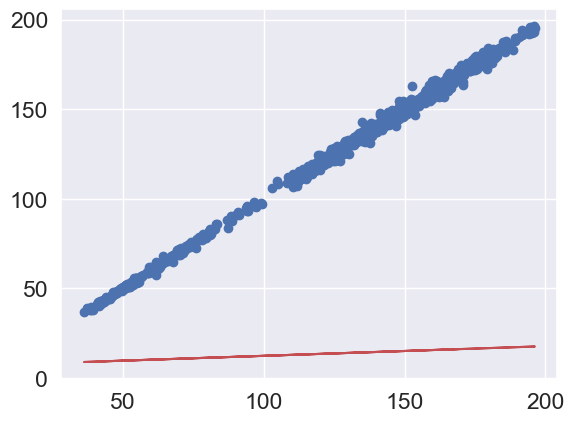

In [24]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [25]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

C:\Users\chakr\AppData\Local\Temp\ipykernel_36536\2453269629.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


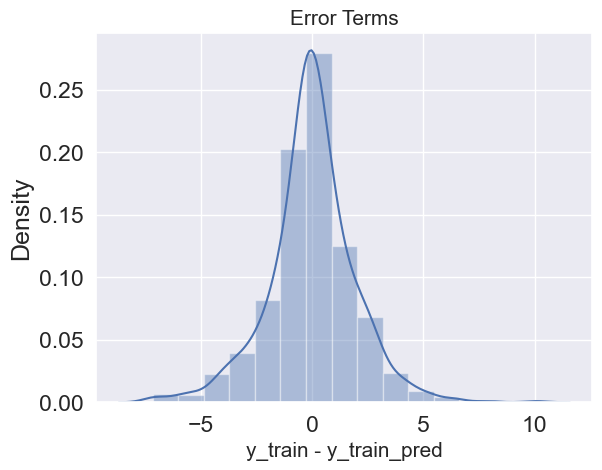

In [26]:

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

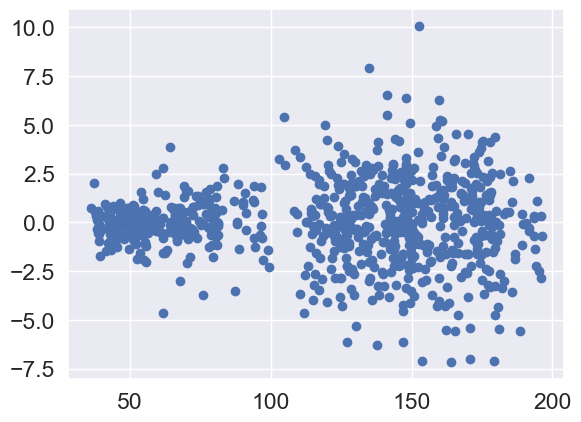

In [27]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.998
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.Yes,There is strong correlation between opening and closing price pf the stock.
3. Was your plot of the error terms a bell curve? Yes